In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [3]:
# K-means clustering function
def k_means_clusteing(data, k=2, max_iters=100):
    # Initialize centroids randomly
    centroids = data[np.random.choice(range(len(data)), k, replace=False)]
    
    # Main loop
    for _ in range(max_iters):
        # Assign each data point to the closest centroid
        clusters = [[] for _ in range(k)]
        for point in data:
            print(point)
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster_assignment = np.argmin(distances)
            clusters[cluster_assignment].append(point)
        
        # Update centroids
        new_centroids = [np.mean(cluster, axis=0) for cluster in clusters if cluster]
        
        # Check for convergence
        if np.all([np.array_equal(c, nc) for c, nc in zip(centroids, new_centroids)]):
            break
        
        centroids = new_centroids
    
    return np.array(centroids), [np.array(cluster) for cluster in clusters]

In [82]:
# K-means clustering function
def k_means_clustering(data, k=2, max_iters=100):
    # Initialize centroids randomly
    centroids = data[np.random.choice(range(len(data)), k, replace=False)]

    # Main loop
    for _ in range(max_iters):
        # Assign each data point to the closest centroid
        clusters = [[] for _ in range(k)]
        for point in data:
            print(point)
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster_assignment = np.argmin(distances)
            clusters[cluster_assignment].append(point)
        
        # Update centroids
        new_centroids = [np.mean(cluster, axis=0) for cluster in clusters if cluster]
        
        # Check for convergence
        if np.all([np.array_equal(c, nc) for c, nc in zip(centroids, new_centroids)]):
            break
        
        centroids = new_centroids
    
    return np.array(centroids), [np.array(cluster) for cluster in clusters]

In [83]:
k_means_clustering(metadata_features, num_clusters)

0.0
new

0.0
new

1.0
new

1.0
new

1.0
new



In [4]:
# Generate synthetic examples based on the selected representatives
def generate_synthetic_examples(centroids, clusters):
    synthetic_examples = []
    for cluster in clusters:
        centroid = np.mean(cluster, axis=0)
        synthetic_examples.append(2 * centroid - cluster)
    return synthetic_examples

In [29]:
# Path to the metadata
metadata_path = r'./HAM10000_metadata.csv'

# Load metadata from the specified path
metadata = pd.read_csv(metadata_path)

for i in metadata:
    print("{}: {}".format(i,metadata[i].unique()))

lesion_id: ['HAM_0000118' 'HAM_0002730' 'HAM_0001466' ... 'HAM_0005579' 'HAM_0001576'
 'HAM_0002867']
image_id: ['ISIC_0027419' 'ISIC_0025030' 'ISIC_0026769' ... 'ISIC_0033536'
 'ISIC_0032854' 'ISIC_0032258']
dx: ['bkl' 'nv' 'df' 'mel' 'vasc' 'bcc' 'akiec']
dx_type: ['histo' 'consensus' 'confocal' 'follow_up']
age: [80. 75. 60. 70. 55. 85. 65. 40. 50. 45. 35.  0. 30. nan  5. 25. 20. 10.
 15.]
sex: ['male' 'female' 'unknown']
localization: ['scalp' 'ear' 'face' 'back' 'trunk' 'chest' 'upper extremity' 'abdomen'
 'unknown' 'lower extremity' 'genital' 'neck' 'hand' 'foot' 'acral']


In [30]:
# Encode 'sex' column as numerical values
metadata['sex'] = metadata['sex'].map({'male': 0, 'female': 1})
print(metadata['sex'].unique())

[ 0.  1. nan]


In [31]:
features = ['age', 'sex']  # Using 'age' and 'sex' as features for clustering

# Normalize the 'age' column
metadata['age'] = (metadata['age'] - metadata['age'].mean()) / metadata['age'].std()

In [33]:
metadata['age']

0        1.658130
1        1.658130
2        1.658130
3        1.658130
4        1.363469
           ...   
10010   -0.699163
10011   -0.699163
10012   -0.699163
10013    1.658130
10014    1.068807
Name: age, Length: 10015, dtype: float64

In [32]:
metadata.shape

(10015, 7)

In [36]:
metadata.dropna(subset=features, inplace=True)

In [37]:
metadata.shape

(9948, 7)

In [40]:
# Convert DataFrame to NumPy array
metadata_features = metadata[features].values
metadata_features.shape

(9948, 2)

In [41]:
num_clusters = 5
centroids, clusters = k_means_clustering(metadata_features, num_clusters)

In [44]:
print(centroids.shape)

(5, 2)


In [60]:
print(len(clusters[0][0]))

2


In [45]:
cluster_labels = np.zeros(len(metadata_features))
for i, cluster in enumerate(clusters):
    for point in cluster:
        cluster_labels[np.where((metadata_features == point).all(axis=1))] = i

In [49]:
np.unique(cluster_labels)

array([0., 1., 2., 3., 4.])

In [50]:
metadata['cluster'] = cluster_labels.astype(int)
metadata

,lesion_id,image_id,dx,dx_type,age,sex,localization,cluster
0,HAM_0000118,ISIC_0027419,bkl,histo,1.658130,0.0,scalp,1
1,HAM_0000118,ISIC_0025030,bkl,histo,1.658130,0.0,scalp,1
2,HAM_0002730,ISIC_0026769,bkl,histo,1.658130,0.0,scalp,1
3,HAM_0002730,ISIC_0025661,bkl,histo,1.658130,0.0,scalp,1
4,HAM_0001466,ISIC_0031633,bkl,histo,1.363469,0.0,ear,1
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,-0.699163,0.0,abdomen,2
10011,HAM_0002867,ISIC_0033550,akiec,histo,-0.699163,0.0,abdomen,2
10012,HAM_0002867,ISIC_0033536,akiec,histo,-0.699163,0.0,abdomen,2
10013,HAM_0000239,ISIC_0032854,akiec,histo,1.658130,0.0,face,1


In [51]:
for i, cluster in enumerate(clusters):
    print(f"Cluster {i+1} contains {len(cluster)} entries")

Cluster 1 contains 1903 entries
Cluster 2 contains 1817 entries
Cluster 3 contains 2193 entries
Cluster 4 contains 2549 entries
Cluster 5 contains 1486 entries


In [52]:
print("\nFirst 100 entries with their assigned clusters:")
print(metadata.head(100))


First 100 entries with their assigned clusters:
      lesion_id      image_id   dx dx_type       age  sex localization  \
0   HAM_0000118  ISIC_0027419  bkl   histo  1.658130  0.0        scalp   
1   HAM_0000118  ISIC_0025030  bkl   histo  1.658130  0.0        scalp   
2   HAM_0002730  ISIC_0026769  bkl   histo  1.658130  0.0        scalp   
3   HAM_0002730  ISIC_0025661  bkl   histo  1.658130  0.0        scalp   
4   HAM_0001466  ISIC_0031633  bkl   histo  1.363469  0.0          ear   
..          ...           ...  ...     ...       ...  ...          ...   
95  HAM_0000746  ISIC_0027023  bkl   histo  0.479484  0.0         face   
96  HAM_0001473  ISIC_0029022  bkl   histo  1.068807  0.0         face   
97  HAM_0003007  ISIC_0025388  bkl   histo -0.699163  1.0      abdomen   
98  HAM_0003007  ISIC_0028080  bkl   histo -0.699163  1.0      abdomen   
99  HAM_0002957  ISIC_0026153  bkl   histo  1.068807  0.0         back   

    cluster  
0         1  
1         1  
2         1  
3     

In [63]:
synthetic_examples = generate_synthetic_examples(centroids, clusters)

In [73]:
len(synthetic_examples[0])

1903

In [71]:
# Print the synthetic examples
for i, synthetic_cluster in enumerate(synthetic_examples):
    print(f"\nSynthetic Examples for Cluster {i+1}:")
    print(synthetic_cluster)


Synthetic Examples for Cluster 1:
[[-0.37337844  1.        ]
 [-0.37337844  1.        ]
 [ 0.51060656  1.        ]
 ...
 [ 0.51060656  1.        ]
 [ 0.21594489  1.        ]
 [-0.37337844  1.        ]]

Synthetic Examples for Cluster 2:
[[ 1.22416515  0.43037975]
 [ 1.22416515  0.43037975]
 [ 1.22416515  0.43037975]
 ...
 [ 1.22416515  0.43037975]
 [ 1.51882681 -0.56962025]
 [ 1.22416515  0.43037975]]

Synthetic Examples for Cluster 3:
[[-0.4094729  0.       ]
 [-0.4094729  0.       ]
 [-0.4094729  0.       ]
 ...
 [-0.4094729  0.       ]
 [-0.4094729  0.       ]
 [-0.4094729  0.       ]]

Synthetic Examples for Cluster 4:
[[-1.44523855  0.76853668]
 [-1.44523855  0.76853668]
 [-1.15057689  0.76853668]
 ...
 [-1.44523855  0.76853668]
 [-1.44523855  0.76853668]
 [-1.44523855  0.76853668]]

Synthetic Examples for Cluster 5:
[[0.43149697 0.        ]
 [0.43149697 0.        ]
 [0.13683531 0.        ]
 ...
 [0.43149697 0.        ]
 [0.13683531 0.        ]
 [0.43149697 0.        ]]


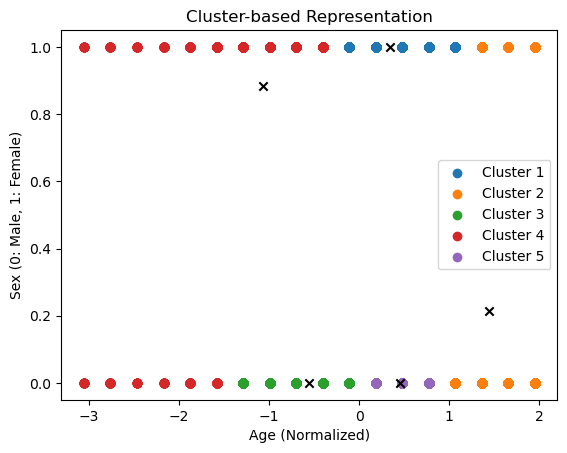

In [74]:
for i, cluster in enumerate(clusters):
    plt.scatter(cluster[:, 0], cluster[:, 1], label=f'Cluster {i+1}')

# Plot centroids
for centroid in centroids:
    plt.scatter(centroid[0], centroid[1], marker='x', color='black')

plt.xlabel('Age (Normalized)')
plt.ylabel('Sex (0: Male, 1: Female)')
plt.title('Cluster-based Representation')
plt.legend()
plt.show()